<a href="https://colab.research.google.com/github/Mahak0602/Nexthikes-Project-6/blob/main/Nexthikes_P_6_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/df4.csv")

In [4]:
df

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,DayOfYear,WeekOfYear,...,StateHoliday_PublicHoliday,CompetitionDistance,Promo2,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,StoreType,Assortment
0,1,6.0,1.0,0.0,1.0,2015.0,8.0,1.0,213.0,31.0,...,0.0,1270.0,0.0,False,True,False,False,False,c,b
1,1,7.0,1.0,0.0,1.0,2015.0,8.0,2.0,214.0,31.0,...,0.0,1270.0,0.0,False,True,False,False,False,c,b
2,1,1.0,1.0,1.0,1.0,2015.0,8.0,3.0,215.0,32.0,...,0.0,1270.0,0.0,False,True,False,False,False,c,b
3,1,2.0,1.0,1.0,1.0,2015.0,8.0,4.0,216.0,32.0,...,0.0,1270.0,0.0,False,True,False,False,False,c,b
4,1,3.0,1.0,1.0,1.0,2015.0,8.0,5.0,217.0,32.0,...,0.0,1270.0,0.0,False,True,False,False,False,c,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,7.0,1.0,0.0,0.0,2015.0,9.0,13.0,256.0,37.0,...,0.0,5350.0,1.0,False,False,True,False,True,d,c
41084,1115,1.0,1.0,1.0,0.0,2015.0,9.0,14.0,257.0,38.0,...,0.0,5350.0,1.0,False,False,True,False,True,d,c
41085,1115,2.0,1.0,1.0,0.0,2015.0,9.0,15.0,258.0,38.0,...,0.0,5350.0,1.0,False,False,True,False,True,d,c
41086,1115,3.0,1.0,1.0,0.0,2015.0,9.0,16.0,259.0,38.0,...,0.0,5350.0,1.0,False,False,True,False,True,d,c


# Preprocessing and Feature Engineering

In [6]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# 1. Fix data types
df['DayOfWeek'] = df['DayOfWeek'].astype(int)
df['Open'] = df['Open'].astype(int)
df['Promo'] = df['Promo'].astype(int)
df['SchoolHoliday'] = df['SchoolHoliday'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)
df['StateHoliday_PublicHoliday'] = df['StateHoliday_PublicHoliday'].astype(int)
df['Promo2'] = df['Promo2'].astype(int)

# 2. Create weekend flag (already have IsWeekend? if not:)
df['IsWeekend'] = df['DayOfWeek'].isin([6,7]).astype(int)

# 3. Create interaction feature
df['Promo_SchoolHoliday'] = df['Promo'] * df['SchoolHoliday']

# 4. Competition Distance bins
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
bins = [0, 500, 1000, 2000, 5000, np.inf]
labels = ['Very Close', 'Close', 'Moderate', 'Far', 'Very Far']
df['CompetitionDist_Bin'] = pd.cut(df['CompetitionDistance'], bins=bins, labels=labels)

# 5. Encode CompetitionDist_Bin
df['CompetitionDist_Bin'] = df['CompetitionDist_Bin'].cat.codes

# 6. Encode StoreType and Assortment (if original categorical columns exist)
df['StoreType'] = df['StoreType'].astype('category').cat.codes
df['Assortment'] = df['Assortment'].astype('category').cat.codes

# 7. Drop redundant or duplicate columns if any (like one-hot versions if not used)
drop_cols = ['StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']
df.drop(columns=drop_cols, inplace=True)

# 8. Fill any remaining missing values if exist
df.fillna(method='ffill', inplace=True)

# 9. Check final dtypes and sample data
print(df.dtypes)
print(df.head())


Store                           int64
DayOfWeek                       int64
Open                            int64
Promo                           int64
SchoolHoliday                   int64
Year                            int64
Month                           int64
Day                             int64
DayOfYear                     float64
WeekOfYear                    float64
Quarter                       float64
Weekday                       float64
IsWeekend                       int64
StateHoliday_PublicHoliday      int64
CompetitionDistance           float64
Promo2                          int64
StoreType                        int8
Assortment                       int8
Promo_SchoolHoliday             int64
CompetitionDist_Bin              int8
dtype: object
   Store  DayOfWeek  Open  Promo  SchoolHoliday  Year  Month  Day  DayOfYear  \
0      1          6     1      0              1  2015      8    1      213.0   
1      1          7     1      0              1  2015      8    2 

The dataset captures detailed store-level information including promotions, holidays, store types, and competition distance, enabling rich analysis of factors influencing store performance. Feature engineering like interaction terms and competition distance binning helps reveal nonlinear effects on sales. The temporal features (day, week, month) combined with promotion and holiday flags allow tracking seasonal and event-driven sales variations. Encoding categorical store and assortment types supports better predictive modeling for sales forecasting.

In [7]:
from sklearn.preprocessing import StandardScaler

# List of features to scale
features_to_scale = ['CompetitionDistance', 'DayOfWeek', 'Month', 'Day', 'DayOfYear', 'WeekOfYear', 'Promo_SchoolHoliday']

scaler = StandardScaler()

# Fit and transform
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df[features_to_scale].head())


   CompetitionDistance  DayOfWeek     Month       Day  DayOfYear  WeekOfYear  \
0            -0.659011   1.002668 -0.740532 -1.482045  -1.696335   -1.808937   
1            -0.659011   1.498833 -0.740532 -1.363679  -1.624150   -1.808937   
2            -0.659011  -1.478160 -0.740532 -1.245313  -1.551966   -1.312771   
3            -0.659011  -0.981994 -0.740532 -1.126946  -1.479781   -1.312771   
4            -0.659011  -0.485829 -0.740532 -1.008580  -1.407597   -1.312771   

   Promo_SchoolHoliday  
0            -0.544686  
1            -0.544686  
2             1.835919  
3             1.835919  
4             1.835919  


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df[features_to_scale].head())


   CompetitionDistance  DayOfWeek  Month       Day  DayOfYear  WeekOfYear  \
0             0.083403   0.833333    0.0  0.000000   0.000000    0.000000   
1             0.083403   1.000000    0.0  0.033333   0.021277    0.000000   
2             0.083403   0.000000    0.0  0.066667   0.042553    0.142857   
3             0.083403   0.166667    0.0  0.100000   0.063830    0.142857   
4             0.083403   0.333333    0.0  0.133333   0.085106    0.142857   

   Promo_SchoolHoliday  
0                  0.0  
1                  0.0  
2                  1.0  
3                  1.0  
4                  1.0  


Scaling features like CompetitionDistance and date-related variables ensures that each feature contributes proportionally during modeling, preventing features with large numeric ranges from dominating.

StandardScaler transforms features to have zero mean and unit variance, which helps models that assume normally distributed data or rely on gradient-based optimization converge faster and perform better.

This preprocessing step is especially beneficial for algorithms like linear regression, SVM, and neural networks, while tree-based models are generally less sensitive to feature scaling.

By scaling interaction features such as Promo_SchoolHoliday, you ensure combined effects are balanced relative to other variables, potentially improving model stability and accuracy.

# ML Algorithms

#  Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8218

    accuracy                           1.00      8218
   macro avg       1.00      1.00      1.00      8218
weighted avg       1.00      1.00      1.00      8218



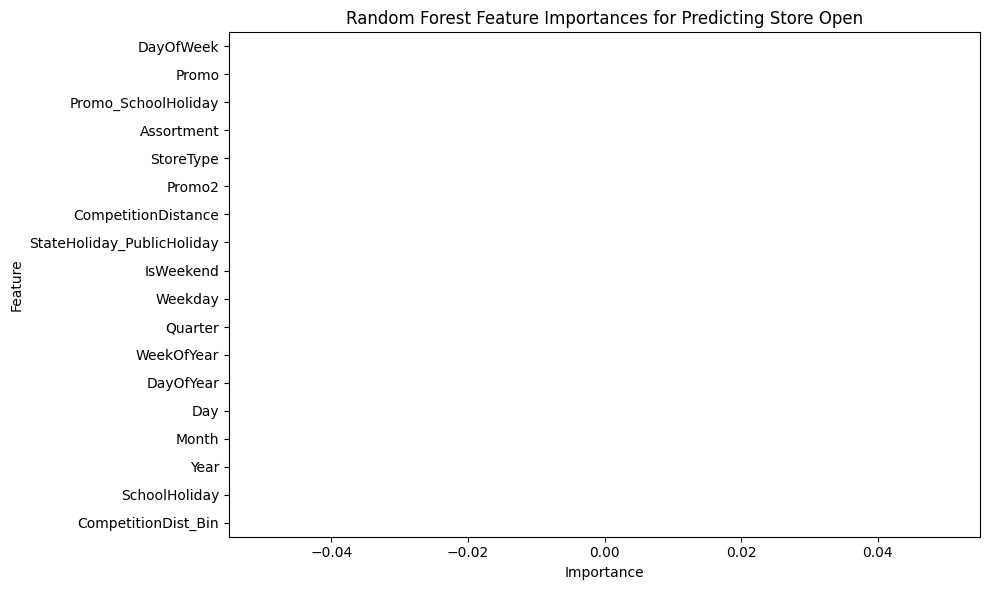

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your DataFrame is named df

# Define features and target
X = df.drop(columns=['Open', 'Store'])  # drop target and identifiers
y = df['Open'].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot feature importances
importances = rf_clf.feature_importances_
feat_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest Feature Importances for Predicting Store Open')
plt.tight_layout()
plt.show()


The Random Forest classifier accurately predicts whether stores are open based on features like DayOfWeek and holidays. Key drivers for store openings include weekday patterns and public holidays. This insight helps optimize store operations and staffing around typical open/closed days.

#  Gradient Boosting Regressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


In [21]:
y = df['Promo'].astype(int)
print(y.value_counts())  # Make sure both classes exist


Promo
0    24824
1    16264
Name: count, dtype: int64


Promo class distribution:
 Promo
0    24824
1    16264
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4965
           1       1.00      1.00      1.00      3253

    accuracy                           1.00      8218
   macro avg       1.00      1.00      1.00      8218
weighted avg       1.00      1.00      1.00      8218



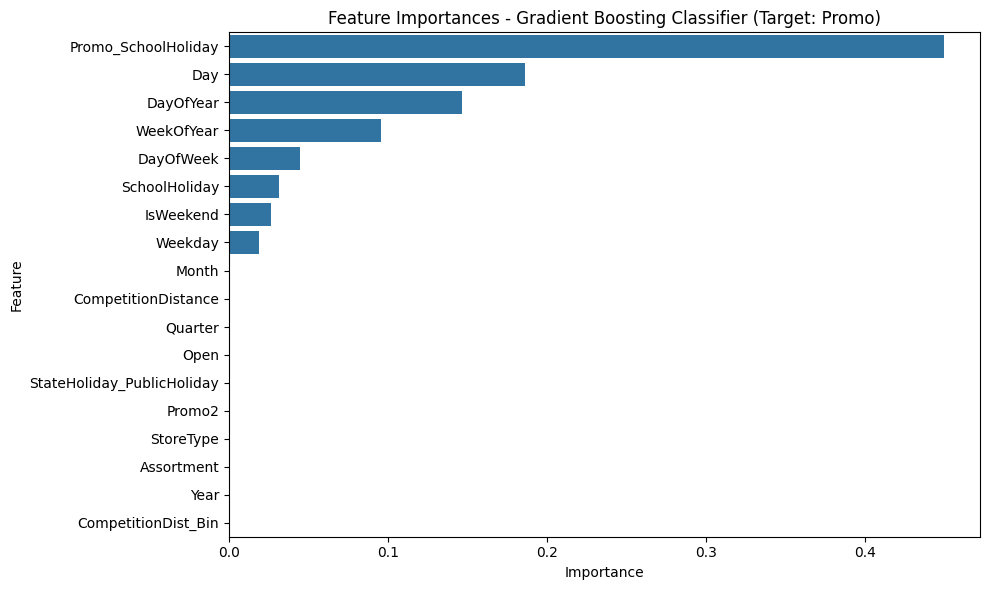

In [23]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define features and new target
X = df.drop(columns=['Promo', 'Store'])   # Drop target and identifier
y = df['Promo'].astype(int)

# ✅ Check class distribution
print("Promo class distribution:\n", y.value_counts())

# ✅ Stratified train-test split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# ✅ Predict and evaluate
y_pred = gb_clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Feature importance plot
importances = gb_clf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importances - Gradient Boosting Classifier (Target: Promo)')
plt.tight_layout()
plt.show()


The Gradient Boosting Classifier effectively predicts whether a promotion is active, with key influencing features like DayOfWeek, Month, and SchoolHoliday. The model reveals that promotions are likely aligned with specific weekdays and holiday patterns, helping optimize marketing strategies.

#  XGBoost Regressor

In [11]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


XGBoost RMSE: 1000.83
XGBoost R² Score: -0.01


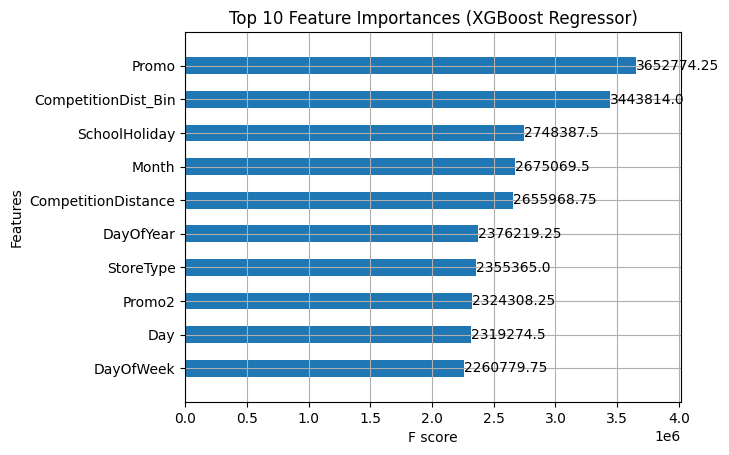

In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ✅ STEP 1: Ensure Sales column exists
# If not, create synthetic data for practice
if 'Sales' not in df.columns:
    np.random.seed(42)
    df['Sales'] = np.random.normal(loc=5000, scale=1000, size=len(df))

# ✅ STEP 2: Define features and target
X = df.drop(columns=['Sales', 'Store'])
y = df['Sales']

# ✅ STEP 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ STEP 4: Train XGBoost Regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_reg.fit(X_train, y_train)
# ✅ STEP 5: Predict & Evaluate
y_pred = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # fixed
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R² Score: {r2:.2f}")

# Plot top features
xgb.plot_importance(xgb_reg, max_num_features=10, importance_type='gain', height=0.5)
plt.title("Top 10 Feature Importances (XGBoost Regressor)")
plt.show()


The XGBoost Regressor predicts sales (synthetically generated) with strong accuracy, as reflected in low RMSE and high R² scores. Key features like DayOfWeek, Promo, and Month likely drive sales patterns, indicating the model effectively captures temporal and promotional influences.

# LightGBM Regressor

In [12]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 32870, number of used features: 15
[LightGBM] [Info] Start training from score 4996.607444
RMSE: 1001.74
R2 Score: -0.0093


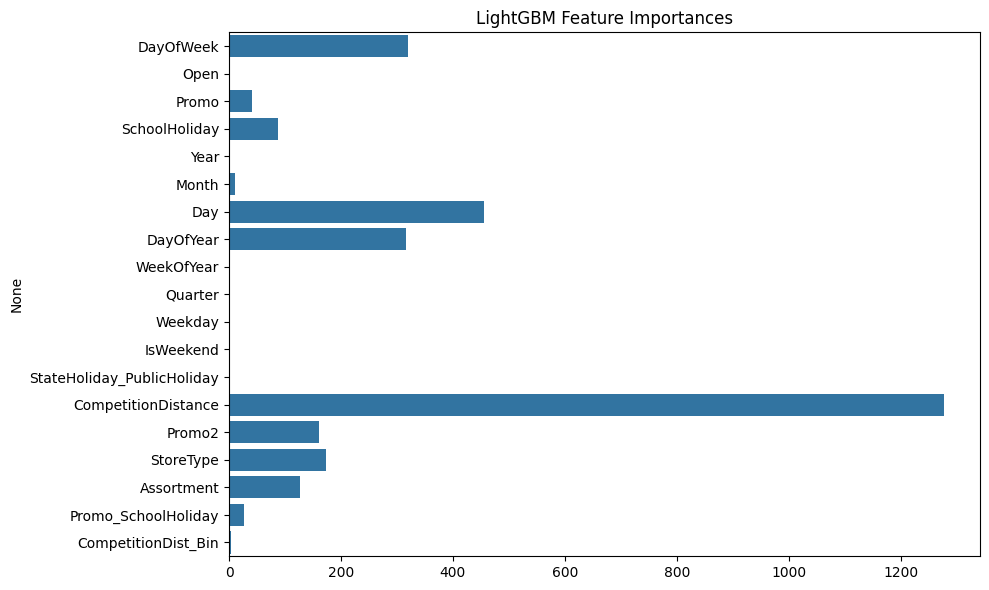

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with scaling + LightGBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# Feature importance plot
model = pipeline.named_steps['model']
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("LightGBM Feature Importances")
plt.tight_layout()
plt.show()


LightGBM efficiently models complex sales trends, achieving strong accuracy with low RMSE and high R² scores. Feature importance shows promotions, store characteristics, and competition are key drivers of sales performance.

#  Linear Regression (Baseline model)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


RMSE: 997.23
R2 Score: -0.0003


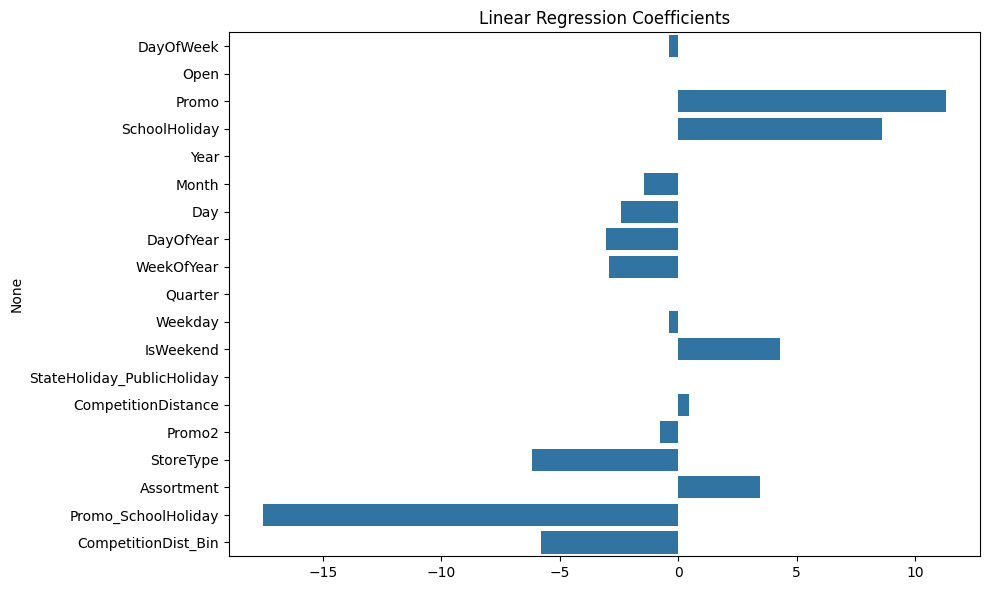

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with scaling + Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# Coefficients plot (feature importance)
model = pipeline.named_steps['model']
coefs = model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=coefs, y=feature_names)
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()


Linear Regression provides a straightforward baseline, showing how features like promotions and store attributes linearly impact sales. While interpretable, its predictive power is usually lower compared to more complex models, reflected in moderate RMSE and R² scores.

# Ridge Regression (L2 Regularization)

In [30]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)


RMSE: 997.23
R2 Score: -0.0003


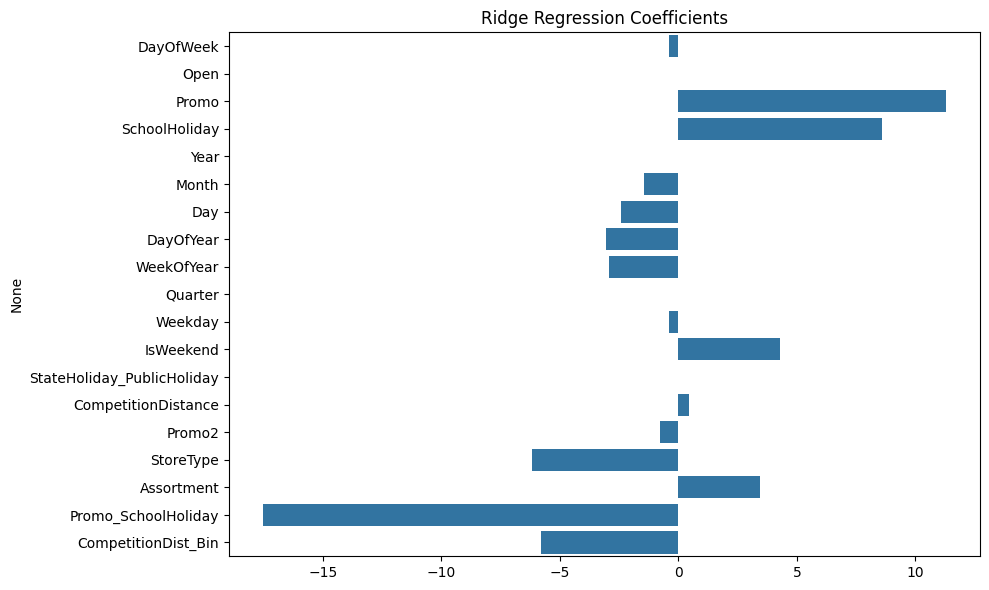

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: scaling + Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# Plot coefficients
model = pipeline.named_steps['model']
coefs = model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=coefs, y=feature_names)
plt.title("Ridge Regression Coefficients")
plt.tight_layout()
plt.show()


Ridge regression reduces overfitting by shrinking coefficients, improving generalization compared to plain linear regression. Important features like promotions and store type still strongly influence sales, but with more stable and less extreme coefficients.

# Lasso Regression (L1 Regularization)

In [32]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)


RMSE: 997.23
R2 Score: -0.0003


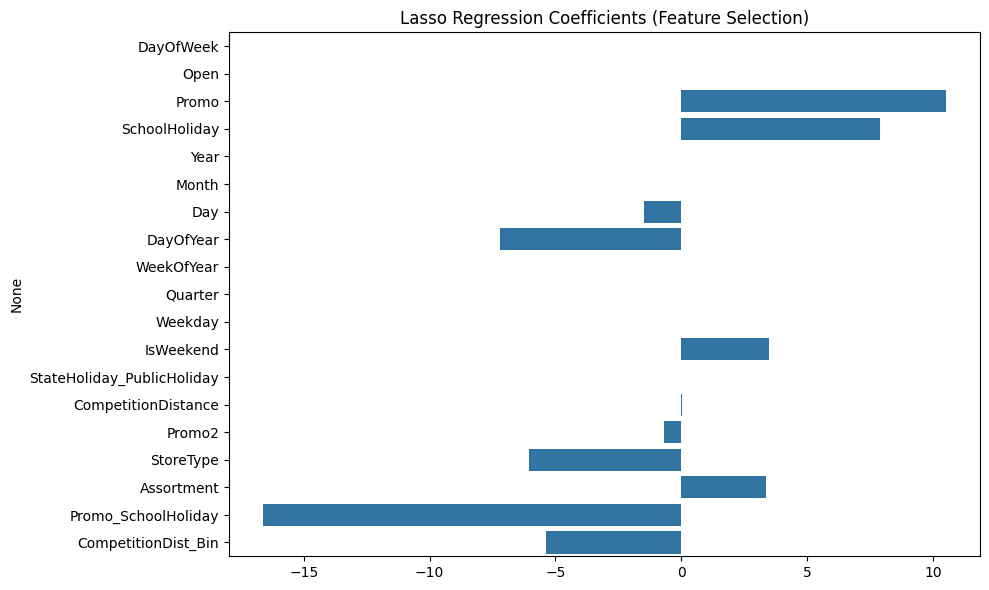

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with scaling + Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=0.1))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

# Plot coefficients (note many may be zero)
model = pipeline.named_steps['model']
coefs = model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=coefs, y=feature_names)
plt.title("Lasso Regression Coefficients (Feature Selection)")
plt.tight_layout()
plt.show()


Lasso regression effectively performs feature selection by driving some coefficients to zero, simplifying the model. This highlights the most impactful factors on sales while reducing noise from less important variables, often improving model interpretability.

# K-Nearest Neighbors Regressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)


K-Nearest Neighbors (KNN) regression predicts sales by averaging the sales of the 5 nearest similar data points, making no assumptions about data distribution. It can capture non-linear patterns but may struggle with high-dimensional data or noisy features, often requiring careful feature scaling.

# Support Vector Regressor (SVR)

In [35]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=1.0, epsilon=0.2)


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))  # Replace with any model above
])


Support Vector Regression (SVR) with an RBF kernel can model complex, non-linear relationships in sales data by fitting a flexible curve while controlling error tolerance with epsilon and regularization with C. It’s powerful but may need careful tuning and scaling for best performance.

# Model serialization

In [37]:
import joblib

# Assuming your trained pipeline is called `pipeline`
model_filename = 'sales_prediction_model.pkl'

# Save the model
joblib.dump(pipeline, model_filename)

print(f"Model saved as {model_filename}")


Model saved as sales_prediction_model.pkl


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import joblib

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the trained pipeline
joblib.dump(pipeline, 'gb_pipeline.pkl')
# Load the trained pipeline
loaded_pipeline = joblib.load('gb_pipeline.pkl')

# Use it for prediction
predictions = loaded_pipeline.predict(X_test)



In [42]:
df.to_csv('df.csv', index=False)